# Poking Machine Learning with Sticks

In [4]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
from MaterialsImages import MaterialsImages

In [5]:
m = MaterialsImages()
m.show_datasets()

Dataset atfrac contains 42 entries with shape (42, 180902)
Dataset atfrac_keys contains 42 entries with shape (42,)
Dataset energy_eV contains 220 entries with shape (220,)
Dataset images contains 180902 entries with shape (180902, 64, 64, 3)
Dataset loading_keys contains 43 entries with shape (43,)
Dataset loadings contains 43 entries with shape (43, 180902)
Dataset plate_id contains 180902 entries with shape (180902,)
Dataset sample_id contains 180902 entries with shape (180902,)
Dataset spectra contains 180902 entries with shape (180902, 220)


In [6]:
f = h5py.File("./dataset_comp_image_spectra.h5")

spectra = np.zeros(f['spectra'].shape)
energy_ev = np.array(f['energy_eV'])
for j in range(len(energy_ev)):
    spectra[:,j] = f['spectra'][:,j]
compositions = np.zeros(f['atfrac'].shape)
for j in range(42):
    compositions[j,:] = f['atfrac'][j,:]

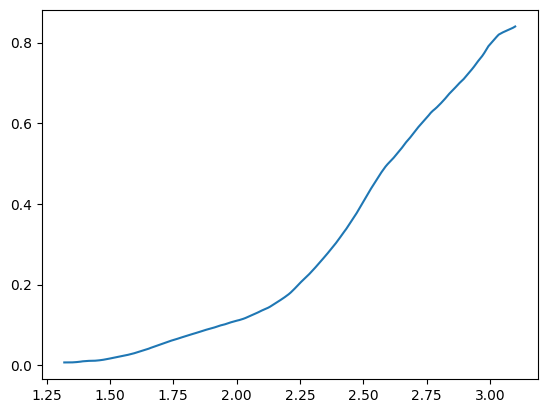

In [7]:
plt.plot(energy_ev,(spectra[58866,:]*energy_ev)**2)

In [8]:
import regression
x, y = spectra[50:53,:].T, energy_ev.reshape(-1,1)[:, 0]
x = np.arange(10).reshape(-1, 1).astype(float)
y = np.arange(10).astype(float) + 10
print(x.shape) # predictor variables
print(y.shape) # response variables
model = regression.OMARS()
model.find_bases(x, y)

(10, 1)
(10,)


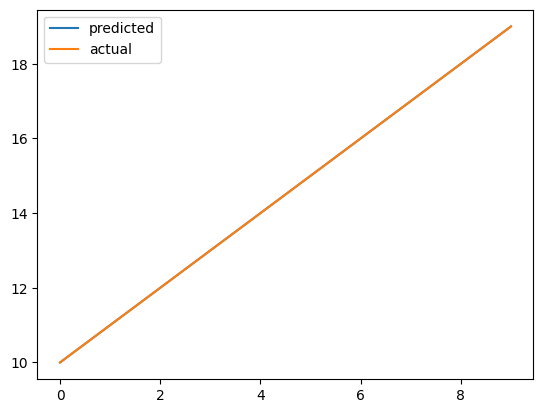

In [9]:
y_pred = model(x)
plt.plot(y_pred, label='predicted')
plt.plot(y, label='actual')
plt.legend()    